# LC-MS MetaboloTools

In [1]:
# Data Science Tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
# Bioinfokit
# !pip install bioinfokit
import bioinfokit as bik
from bioinfokit import analys, visuz

## Case #1 - metabolite name-only data

#### Read LC-MS output metabolite name-containing files and preprocess

In [2]:
# Control
sample_T_C_1 = pd.read_excel('sample_T_C_1.xlsx' 
                             # ,header=None
                            ).iloc[:, 0].tolist()
sample_T_C_2 = pd.read_excel('sample_T_C_2.xlsx', 
                             # ,header=None
                            ).iloc[:, 0].tolist()
sample_T_C_3  = pd.read_excel('sample_T_C_3.xlsx', 
                              # ,header=None
                             ).iloc[:, 0].tolist()

# In Vitro
sample_T_invitro_1 = pd.read_excel('sample_T_in_vitro_1.xlsx', 
                                  # ,header=None
                                  ).iloc[:, 0].tolist()
sample_T_invitro_2 = pd.read_excel('sample_T_in_vitro_2.xlsx'
                                   # ,header=None
                                  ).iloc[:, 0].tolist()
sample_T_invitro_3 = pd.read_excel('sample_T_in_vitro_3.xlsx'
                                   # ,header=None
                                  ).iloc[:, 0].tolist()

# In Vivo
sample_T_invivo_1 = pd.read_excel('sample_T_in_vivo_1.xlsx'
                                  # ,header=None
                                 ).iloc[:, 0].tolist()
sample_T_invivo_2 = pd.read_excel('sample_T_in_vivo_2.xlsx'
                                 # ,header=None
                                 ).iloc[:, 0].tolist()
sample_T_invivo_3 = pd.read_excel('sample_T_in_vivo_3.xlsx'
                                 # ,header=None
                                 ).iloc[:, 0].tolist()

In [3]:
# Create a dictionary of Sample names and metabolite name-containing lists

data = {
    "Control T-cells 1": sample_T_C_1,
    "Control T-cells 2": sample_T_C_2,
    "Control T-cells 3": sample_T_C_3,

    "In Vitro T-cells 1": sample_T_invitro_1,
    "In Vitro T-cells 2": sample_T_invitro_2,
    "In Vitro T-cells 3": sample_T_invitro_3,

    "In Vivo T-cells 1": sample_T_invivo_1,
    "In Vivo T-cells 2": sample_T_invivo_2,
    "In Vivo T-cells 3": sample_T_invivo_3,
}

In [4]:
# Build a data frame of samples and their metabolites

metabolites = set(metabolite for sample in data.values() for metabolite in sample)

df = pd.DataFrame(
    {metabolite: [1 if metabolite in data[name] else 0 for name in data.keys()] for metabolite in metabolites},
    index=data.keys()
)

df

,Fumarate,L-Arginine,Pyruvate,Linoleate,Isocitrate,3-Phosphoglycerate,S-adenosylmethionine,Nitric oxide,Glutathione,Acetyl-CoA,...,Citrate,Oleate,Succinyl-CoA,Succinate,GTP,L-Isoleucine,Putrescine,Glucose-6-phosphate,UTP,Palmitate
Control T-cells 1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Control T-cells 2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
Control T-cells 3,1,1,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,1,1,0
In Vitro T-cells 1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
In Vitro T-cells 2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,0,1,1,1
In Vitro T-cells 3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,0,1,1,1,0
In Vivo T-cells 1,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,1,0,1
In Vivo T-cells 2,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,0,0,0,1,0,1
In Vivo T-cells 3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,0,0


## Case #2 - log-transofmed metabolite concentration data

In [65]:
df = pd.read_excel('Sci Rep Ivanisenko COVID data.xlsx')
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df.set_index(['Sample'], inplace=True)
df = df.T
df

Sample,D-Glucuronic Acid,L-Phenylalanine,Phosphorylcholine,Choline,Pipecolic Acid,Carnitine,Betaine,Acetylcarnitine,3-Hydroxykynurenine,Urea,...,Histamine,Uridine,2-Hydroxybutanoic Acid,Dump,Acetyl-Coa,3-Hydroxybutyric Acid,Pyroglutamic Acid,Cytidine,Glyceric Acid,Imp
CoV 1,8.289143,8.334531,8.252469,7.768051,7.641431,7.776047,7.753383,7.673878,7.690886,7.708253,...,4.637530,4.594294,4.905086,4.343532,4.521044,4.935852,4.184023,4.315996,3.845830,4.095237
CoV 2,8.417784,8.181932,8.124939,7.834772,7.749829,7.896351,7.758183,8.191340,7.636513,7.919423,...,4.878528,4.715635,4.890396,4.487856,4.487778,4.667196,4.317671,4.907629,4.103594,3.928805
CoV 3,8.367845,8.481674,8.184308,7.962172,7.463193,7.743006,7.824911,7.817233,7.673548,7.531386,...,4.977436,4.645421,4.301213,4.599737,4.934117,4.473151,4.101044,4.259555,4.180046,4.091015
CoV 4,8.142342,8.279033,8.039843,7.733535,7.710093,7.844177,7.627203,8.163450,7.652444,7.849609,...,4.707501,4.674892,4.900351,4.140831,4.407535,5.473301,4.275959,4.446568,4.033367,3.882670
CoV 5,8.642581,8.336918,8.196824,7.940049,7.924488,7.658417,7.732509,7.897220,7.644314,7.607237,...,4.663088,4.635151,4.641975,4.470876,4.521134,4.790130,4.427916,4.096461,4.274409,4.237910
CoV 6,8.226839,8.424406,8.241035,7.974477,7.860724,7.919014,7.623335,7.624537,7.500193,7.765961,...,4.704406,4.860621,4.515901,4.499744,4.307968,3.871344,4.363547,4.325982,4.253454,4.017693
CoV 7,8.699235,8.257376,8.239355,7.949717,7.892801,7.609177,7.670718,7.232206,7.699158,7.569245,...,4.654206,4.696498,4.490351,4.686963,4.263476,4.122491,4.452088,3.953323,4.163696,3.998211
CoV 8,8.284988,8.490181,8.232678,7.893945,7.324749,7.817836,7.494081,7.691679,7.726448,7.573597,...,4.453019,4.703440,4.375916,4.574138,4.604193,4.008632,3.898961,3.906431,4.052224,3.989456
CoV 9,8.776409,8.403966,8.298829,7.865609,7.533078,7.547923,7.874547,7.720444,7.626216,7.644497,...,4.645981,4.520787,4.669831,4.433717,4.481784,4.836758,4.154138,4.379794,4.403840,3.856074
CoV 10,8.251633,8.215633,8.176656,8.035881,7.934439,7.753956,7.668873,7.581427,7.606524,7.444510,...,4.814593,4.585282,4.291275,4.575095,4.599744,4.477588,4.283305,3.917491,4.296185,4.038155


In [66]:
# Cluster samples and Metabolites

cluster_map = sns.clustermap(df)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df = df.iloc[:, clustered_cols] # Metabolite clustering 
# clustered_df = df.iloc[clustered_rows, :].iloc[:, clustered_cols] # Metabolite and sample clustering
clustered_df

Sample,Glycerophosphocholine,L-Histidine,Xanthine,L-Tyrosine,Methylcysteine,P-Coumaric Acid,Creatine,Indole,Pyridoxamine,Uric Acid,...,L-Glutamine,7-Methylguanosine,Citraconic Acid,Indole-3-Carboxylic Acid,Alpha-N-Phenylacetyl-L-Glutamine,Uracil,N-Acetyl-Glutamine,L-Lactic Acid,Asparagine,Alpha-Ketoisovaleric Acid
CoV 1,6.881797,6.819090,7.372580,6.764098,6.759576,6.752767,6.821952,6.943947,7.522539,7.442128,...,5.560193,5.598440,5.432213,5.266635,5.647877,5.908687,5.941460,5.701189,5.220714,5.071654
CoV 2,6.954195,6.884546,7.042532,6.742856,6.743247,6.694976,7.044986,6.954093,7.397939,7.445766,...,5.458407,5.671034,5.510222,5.345257,6.366312,5.858345,6.014602,5.876282,5.098755,5.516092
CoV 3,7.263609,7.168553,7.046302,6.819999,6.852491,6.767231,6.867609,7.103278,7.406370,7.379287,...,5.040681,5.595223,5.587781,5.230612,5.656031,5.825310,5.828974,5.631318,5.503897,4.778176
CoV 4,6.797197,6.837181,6.920465,6.765272,6.767853,6.716605,7.933434,6.853857,7.598315,7.532538,...,5.495870,5.779476,5.324322,5.245720,6.144808,5.961718,6.125328,5.942939,5.204571,4.967681
CoV 5,6.977422,7.011933,6.899484,6.883004,6.872194,6.816128,7.476110,7.183035,7.512806,7.456676,...,5.787702,5.329863,5.599828,5.285341,5.468630,5.990723,5.900534,5.776428,5.463015,4.876623
CoV 6,7.313597,6.767189,7.325914,6.871160,6.865736,6.803951,6.700826,7.238746,7.714054,7.600635,...,5.734531,5.866466,5.517432,5.274494,6.260720,6.151676,6.106073,6.100950,5.346435,4.813047
CoV 7,7.440704,7.161933,6.572925,6.636735,6.648960,6.609820,7.079554,6.919920,7.063771,7.167233,...,5.633986,5.522371,5.413956,5.291080,6.050492,5.976676,5.619465,5.866353,5.309181,4.698453
CoV 8,7.276435,6.994977,7.365284,6.830913,6.879412,6.831654,7.267972,7.215190,7.621086,7.528529,...,4.863928,5.367061,5.402083,5.238677,5.594161,6.025561,5.811322,5.791722,5.518321,4.934847
CoV 9,7.259090,6.886292,6.878417,6.801146,6.811386,6.778471,6.865502,7.023436,6.495616,6.460450,...,5.523151,5.550912,5.490034,5.289171,5.871955,5.898761,5.792233,5.888330,5.319351,5.072931
CoV 10,7.441513,6.894615,6.673951,6.555578,6.545316,6.474554,7.333703,6.555206,4.384885,4.439576,...,5.641756,5.350492,5.549688,5.372132,5.509957,5.859156,5.774816,5.822608,5.355432,4.570566


# Metabolite Production Analysis

In [69]:
# Design matrix - Case #1
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': [ 
              'Control T-cells','Control T-cells','Control T-cells',
              'In Vitro T-cells','In Vitro T-cells','In Vitro T-cells',
              'In Vivo T-cells','In Vivo T-cells','In Vivo T-cells',
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

In [68]:
# Design matrix - Case #2
group_data = {
    'Sample': list(clustered_df.T.columns),
    'Group': [ 
              'COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19',
              'COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19','COVID-19',
              'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control',
              'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control',
              'Control','Control','Control','Control','Control','Control','Control','Control','Control','Control'  
              ]
}
group_df = pd.DataFrame(group_data)
unique_groups = group_df['Group'].unique()

# Map samples to their groups
column_to_group = dict(zip(group_df['Sample'], group_df['Group']))
column_to_group

{'CoV 1': 'COVID-19',
 'CoV 2': 'COVID-19',
 'CoV 3': 'COVID-19',
 'CoV 4': 'COVID-19',
 'CoV 5': 'COVID-19',
 'CoV 6': 'COVID-19',
 'CoV 7': 'COVID-19',
 'CoV 8': 'COVID-19',
 'CoV 9': 'COVID-19',
 'CoV 10': 'COVID-19',
 'CoV 11': 'COVID-19',
 'CoV 12': 'COVID-19',
 'CoV 13': 'COVID-19',
 'CoV 14': 'COVID-19',
 'CoV 15': 'COVID-19',
 'CoV 16': 'COVID-19',
 'CoV 17': 'COVID-19',
 'CoV 18': 'COVID-19',
 'CoV 19': 'COVID-19',
 'Control 1': 'Control',
 'Control 2': 'Control',
 'Control 3': 'Control',
 'Control 4': 'Control',
 'Control 5': 'Control',
 'Control 6': 'Control',
 'Control 7': 'Control',
 'Control 8': 'Control',
 'Control 9': 'Control',
 'Control 10': 'Control',
 'Control 11': 'Control',
 'Control 12': 'Control',
 'Control 13': 'Control',
 'Control 14': 'Control',
 'Control 15': 'Control',
 'Control 16': 'Control',
 'Control 17': 'Control',
 'Control 18': 'Control',
 'Control 19': 'Control',
 'Control 20': 'Control',
 'Control 21': 'Control',
 'Control 22': 'Control',
 'Control

### PCA

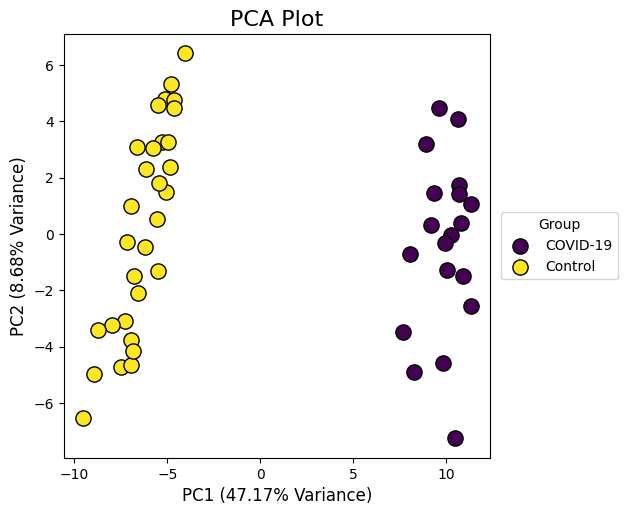

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustered_df)

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)
pca_results

# Create a df for PCA results
pca_df = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])
pca_df['Sample'] = list(clustered_df.T.columns)

# Plot the first 2 PC
plt.figure(figsize=(5.5, 5.5))

pca_df['Group'] = pca_df['Sample'].map(column_to_group)
unique_groups = pca_df['Group'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_groups))) # Choose cmap here, i.e. cm.viridis ot cm.tab10 
                                                               # https://matplotlib.org/stable/users/explain/colors/colormaps.html

for group, color in zip(unique_groups, colors):
    subset = pca_df[pca_df['Group'] == group]
    plt.scatter(
        subset['PC1'], subset['PC2'], 
        label=f"{group}",
        color=color, edgecolor='k', s=120
    )

plt.title('PCA Plot', fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)", fontsize=12)
plt.legend(
    title="Group", fontsize=10, loc='center left', 
    bbox_to_anchor=(1.025, 0.5), borderaxespad=0.
) 
# plt.grid(True)
plt.savefig('PCA plot.png', dpi=600, bbox_inches='tight')
plt.show()

### Heatmap

In [71]:
df_scaled_centred = stats.zscore(df, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df, # Case 1
                    df=df_scaled_centred, # Case 2
                    # cmap='bwr', # Case 1
                    cmap='viridis', # Case 2
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Metabolite clustering
                    # colclus=True, rowclus=True, # Metabolite and sample clustering
                    dim=(18,10),  
                    tickfont=(6,6), r=600, figname='clustered_df', show=False)
plt.close()

### Select Differentially Produced Metabolites

In [72]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")

df["Group"] = df.index.map(column_to_group)
significant_variables = []

significance_th = 0.05 # Pick significance threshold (0.05 / 0.01 / 0.005)

# Perform Two-Way ANOVA with Tukey correction for each Metabolite
for variable in df.columns[:-1]:  # Exclude the "Group" column
    data_long = df.reset_index().melt(id_vars=["index", "Group"], value_vars=[variable])
    data_long.rename(columns={"index": "Sample", "value": "Value", "variable": "Variable"}, inplace=True)
    
    # Perform Two-Way ANOVA
    model = ols("Value ~ C(Group)", data=data_long).fit()
    anova_results = anova_lm(model)
    
    # Significance test
    if anova_results.loc["C(Group)", "PR(>F)"] < significance_th:
        # Perform Tukey
        tukey = pairwise_tukeyhsd(endog=data_long["Value"], groups=data_long["Group"], alpha=0.05)
        significant_comparisons = tukey.summary().data[1:]  # Skip the header
        
        # Check if any pairwise comparison is significant
        is_significant = any(row[4] < significance_th for row in significant_comparisons)
        
        if is_significant:
            significant_variables.append(variable)
            
warnings.filterwarnings("default")
df.drop(columns=["Group"], inplace=True)

# Create a new DataFrame with only significant metabolites
df_significant = df[significant_variables]
df_significant

Sample,D-Glucuronic Acid,L-Phenylalanine,Phosphorylcholine,Choline,Pipecolic Acid,Betaine,Urea,L-Proline,Imidazole,Palmitic Acid,...,5-Hydroxy-L-Tryptophan,Serotonin,L-Homoserine,Deoxyribose 1-Phosphate,Ureidosuccinic Acid,Histamine,Acetyl-Coa,Pyroglutamic Acid,Pyroglutamic Acid,Cytidine
CoV 1,8.289143,8.334531,8.252469,7.768051,7.641431,7.753383,7.708253,7.281195,7.427027,7.451977,...,4.978505,4.852733,4.954624,4.874492,4.727977,4.637530,4.521044,5.158597,4.184023,4.315996
CoV 2,8.417784,8.181932,8.124939,7.834772,7.749829,7.758183,7.919423,7.601676,7.384418,7.361597,...,5.010720,4.684602,4.709138,4.898930,4.792376,4.878528,4.487778,5.196664,4.317671,4.907629
CoV 3,8.367845,8.481674,8.184308,7.962172,7.463193,7.824911,7.531386,7.725710,7.515502,7.441414,...,5.090653,5.139779,4.971546,4.922776,4.854437,4.977436,4.934117,4.874384,4.101044,4.259555
CoV 4,8.142342,8.279033,8.039843,7.733535,7.710093,7.627203,7.849609,7.541414,7.549932,7.409212,...,4.789020,4.689944,4.991828,4.871431,4.856745,4.707501,4.407535,4.486541,4.275959,4.446568
CoV 5,8.642581,8.336918,8.196824,7.940049,7.924488,7.732509,7.607237,7.707798,7.495358,7.600753,...,5.174713,5.126150,4.928373,4.966633,4.917898,4.663088,4.521134,4.632246,4.427916,4.096461
CoV 6,8.226839,8.424406,8.241035,7.974477,7.860724,7.623335,7.765961,7.474566,7.555840,7.475775,...,5.215022,5.064814,5.075971,4.864545,4.909529,4.704406,4.307968,5.274934,4.363547,4.325982
CoV 7,8.699235,8.257376,8.239355,7.949717,7.892801,7.670718,7.569245,7.814079,7.458966,7.410808,...,4.820717,4.834553,4.914027,4.842577,4.721435,4.654206,4.263476,4.975635,4.452088,3.953323
CoV 8,8.284988,8.490181,8.232678,7.893945,7.324749,7.494081,7.573597,7.481392,7.462988,7.464274,...,5.108313,5.210396,5.057511,4.757506,4.738686,4.453019,4.604193,4.738180,3.898961,3.906431
CoV 9,8.776409,8.403966,8.298829,7.865609,7.533078,7.874547,7.644497,7.578656,7.506502,7.459395,...,4.928360,4.976354,5.003305,4.820888,4.829689,4.645981,4.481784,4.503044,4.154138,4.379794
CoV 10,8.251633,8.215633,8.176656,8.035881,7.934439,7.668873,7.444510,7.669118,7.432838,7.527851,...,4.831442,4.944621,4.246514,4.901963,4.873635,4.814593,4.599744,4.710742,4.283305,3.917491


In [73]:
# Cluster differentially-produced metabolites

cluster_map = sns.clustermap(df_significant)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind

clustered_df_significant = df_significant.iloc[:, clustered_cols] # Metabolite clustering 
# clustered_df_significant = df_significant.iloc[clustered_rows, :].iloc[:, clustered_cols] # Metabolite and sample clustering
clustered_df_significant

Sample,4-Hydroxybenzoic Acid,Methylsuccinic Acid,Homovanillic Acid,Methionine Sulfoxide,L-Homocysteic Acid,5'-Methylthioadenosine,Guanidinoacetic Acid,Aica-Riboside,Melatonin,Aminoadipic Acid,...,Dimethylglycine,Glycerophosphocholine,Creatine,Indole,Purine,Mevalonic Acid,Gamma-Aminobutyric Acid,Creatinine,Glutamate,L-Arginine
CoV 1,5.881068,5.393319,5.631743,5.782237,5.715017,5.783820,5.814699,5.121761,5.291107,5.063596,...,6.534145,6.881797,6.821952,6.943947,6.838600,6.672009,6.773092,6.999511,6.810971,7.035924
CoV 2,6.702969,5.618684,5.747530,6.190434,5.686294,5.546547,5.368320,5.289655,5.952668,5.199733,...,6.681773,6.954195,7.044986,6.954093,6.683716,6.476043,6.837826,7.163401,7.265511,6.915304
CoV 3,6.670294,5.446279,5.661084,6.174375,5.732640,5.459397,5.314057,5.199543,5.345661,4.995245,...,6.675364,7.263609,6.867609,7.103278,6.992445,6.818190,6.957165,6.972226,7.575850,7.625368
CoV 4,5.907666,6.488969,5.754980,6.075693,5.536648,5.839818,5.726436,5.096051,5.486204,4.991617,...,6.475592,6.797197,7.933434,6.853857,6.820518,6.625874,6.747783,6.822805,7.033270,7.050902
CoV 5,7.947061,6.074815,5.643673,5.905048,5.632966,5.425153,5.762026,5.228241,5.378351,5.097745,...,6.707841,6.977422,7.476110,7.183035,6.851249,6.672908,6.917783,6.789767,7.194643,7.359884
CoV 6,5.932735,5.336960,5.668663,5.878228,5.581227,5.911518,5.310184,5.197856,5.553725,5.155503,...,6.667056,7.313597,6.700826,7.238746,6.935224,6.746206,6.969798,6.859601,6.936474,7.180064
CoV 7,6.777521,5.651784,5.732392,5.742778,5.674971,5.459607,4.974518,5.219544,5.111800,5.050901,...,6.649354,7.440704,7.079554,6.919920,6.766057,6.601060,6.930255,6.618184,7.223573,6.825085
CoV 8,5.823237,5.825743,5.629378,6.042053,5.627783,5.601693,5.211317,5.101525,5.545762,5.000345,...,6.579529,7.276435,7.267972,7.215190,7.005357,6.811152,6.908516,6.719824,7.389896,7.358760
CoV 9,6.026222,5.467956,5.735527,5.906892,5.717399,5.620497,5.379359,5.247863,5.067594,5.050596,...,6.634119,7.259090,6.865502,7.023436,6.924042,6.747203,6.858369,6.765289,7.336265,7.297019
CoV 10,7.719715,5.942339,5.725608,6.002008,5.740597,5.408915,5.255467,5.243056,5.104331,5.139354,...,6.749297,7.441513,7.333703,6.555206,6.736220,6.540060,7.032244,6.836942,7.416441,6.894243


In [74]:
df_scaled_centred_significant = stats.zscore(df_significant, axis=0) # Case 2

visuz.gene_exp.hmap(
                    # df=df_significant, # Case 1
                    df=df_scaled_centred_significant, # Case 2
                    # cmap='bwr', # Case 1
                    cmap='viridis', # Case 2
                    # Keep the following consistent with the clustering step!!!
                    colclus=True, rowclus=False, # Metabolite clustering
                    # colclus=True, rowclus=True, # Metabolite and sample clustering
                    dim=(12,10),  
                    tickfont=(6,6), r=600, figname='clustered_df_significant', show=False)
plt.close()

In [75]:
clustered_df_significant.T.to_csv('clustered_df_significant.csv') # For CytoScape

### Correlation analysis

In [76]:
# Perform analysis

corr_df = df_significant
corr_df.rename_axis("Metabolite", inplace=True)
corr_df.rename_axis("Metabolite", axis=1,inplace=True)

correlation_matrix = corr_df.corr(method='pearson') # pearson / spearman 

# Cluster
cluster_map = sns.clustermap(correlation_matrix)
plt.close()
clustered_rows = cluster_map.dendrogram_row.reordered_ind
clustered_cols = cluster_map.dendrogram_col.reordered_ind
correlation_matrix = correlation_matrix.iloc[clustered_rows, :].iloc[:, clustered_cols]


correlation_matrix

Metabolite,Choline,L-Alpha-Aminobutyric Acid,Dimethylglycine,3-Aminoisobutanoic Acid,Gamma-Aminobutyric Acid,Beta Aminobutyric Acid,L-Serine,Orotic Acid,Cystathionine,Suberic Acid,...,Indole,Ascorbic Acid,Serotonin,Glycerophosphocholine,Uracil,Aminoadipic Acid,Aminoadipic Acid,Ureidosuccinic Acid,L-Glutamine,Citraconic Acid
Metabolite,,,,,,,,,,,,,,,,,,,,,
Choline,1.000000,0.985302,0.977860,0.961821,0.981372,0.973702,0.931858,0.915797,0.890353,0.903182,...,0.520654,0.668607,0.584466,0.612057,0.610327,-0.726982,-0.726982,-0.130420,-0.246044,-0.204029
L-Alpha-Aminobutyric Acid,0.985302,1.000000,0.993937,0.942113,0.963232,0.958896,0.941273,0.925682,0.876215,0.903303,...,0.552236,0.639817,0.567287,0.607966,0.618170,-0.702949,-0.702949,-0.135041,-0.184331,-0.156643
Dimethylglycine,0.977860,0.993937,1.000000,0.947702,0.962059,0.960394,0.925637,0.907305,0.854233,0.879961,...,0.549371,0.630687,0.572200,0.615054,0.617219,-0.663857,-0.663857,-0.114305,-0.168020,-0.129220
3-Aminoisobutanoic Acid,0.961821,0.942113,0.947702,1.000000,0.952024,0.949078,0.872454,0.836425,0.823482,0.833814,...,0.478695,0.655944,0.593139,0.605189,0.591201,-0.647738,-0.647738,-0.055860,-0.238690,-0.117424
Gamma-Aminobutyric Acid,0.981372,0.963232,0.962059,0.952024,1.000000,0.989983,0.877174,0.853902,0.809507,0.828213,...,0.471180,0.672750,0.622147,0.619066,0.609863,-0.676980,-0.676980,-0.072439,-0.249922,-0.167388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aminoadipic Acid,-0.726982,-0.702949,-0.663857,-0.647738,-0.676980,-0.634452,-0.806349,-0.801010,-0.820469,-0.818326,...,-0.390961,-0.505964,-0.365005,-0.301055,-0.228599,1.000000,1.000000,0.389457,0.366746,0.427694
Aminoadipic Acid,-0.726982,-0.702949,-0.663857,-0.647738,-0.676980,-0.634452,-0.806349,-0.801010,-0.820469,-0.818326,...,-0.390961,-0.505964,-0.365005,-0.301055,-0.228599,1.000000,1.000000,0.389457,0.366746,0.427694
Ureidosuccinic Acid,-0.130420,-0.135041,-0.114305,-0.055860,-0.072439,-0.061919,-0.255014,-0.287334,-0.310613,-0.314986,...,-0.202130,0.158754,0.206861,0.033593,0.081383,0.389457,0.389457,1.000000,0.145189,0.066093


In [80]:
plt.figure(figsize=(24,24)) #Size

sns.heatmap(
    correlation_matrix,   # df
    cmap="bwr",           # Color map
    cbar=False,           # Show the scale
    annot_kws={"size": 8} # Font size
)

# Save the heatmap
output_path = "correlation_matrix_heatmap.png"
plt.savefig(output_path, dpi=600, bbox_inches="tight")
plt.close()